<a href="https://colab.research.google.com/github/BankNatchapol/CPE463-Image-Processing/blob/main/CPE463_image_compression_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

from skimage import io
import pandas as pd

Original : (5, 5)


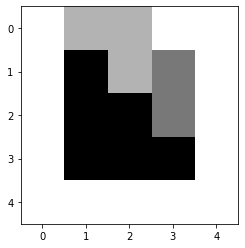

In [136]:
image = np.array([[255, 180, 180, 255, 255],
                  [255,   0, 180, 120, 255],
                  [255,   0,   0, 120, 255],
                  [255,   0,   0,   0, 255],
                  [255, 255, 255, 255, 255]])

print("Original :", image.shape)
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.show()

# **Huffman coding**

In [137]:
#@title Huffman Class
class Node(object):
	left = None
	right = None
	item = None
	weight = 0

	def __init__(self, symbol, weight, l=None, r=None):
		self.symbol = symbol
		self.weight = weight
		self.left = l
		self.right = r

  #Called when outputting/printing the node
	def __repr__(self):
		return '("%s", %s, %s, %s)' % (self.symbol, self.weight, self.left, self.right)


def sortByWeight(node):    
  return (node.weight * 1000000 + ord(node.symbol[0])) #Sort by weight and alphabetical order if same weight
		
#A Class used to apply the Huffman Coding algorithm to encode / compress a message
class HuffmanEncoder:
  def __init__(self):
    self.symbols = {}
    self.codes = {}
    self.tree = []
    self.message = ""
    
  def frequencyAnalysis(self):
    self.symbols = {}
    for symbol in self.message :
        self.symbols[symbol] = self.symbols.get(symbol,0) + 1

  def preorder_traverse(self, node, path=""):
      if node.left == None:
        self.codes[node.symbol] = path
      else:
           self.preorder_traverse(node.left,path+"0")
           self.preorder_traverse(node.right,path+"1")    
	  
  def encode(self, message):
    self.message = list(message.flatten().astype(str))
    #Identify the lsit of symbols and their weights / frequency in the message
    self.frequencyAnalysis()
    
    #Convert list of symbols into a binary Tree structure
    #Step 1: Generate list of Nodes...
    self.tree = []
    for symbol in self.symbols.keys():
      self.tree.append((Node(symbol,self.symbols[symbol],None,None)))
    
    #Step 2: Sort list of nodes per weight
    self.tree.sort(key=sortByWeight)
    
    #Step 3: Organise all nodes into a Binary Tree.
    while len(self.tree)>1: #Carry on till the tree has only one root node!
      leftNode = self.tree.pop(0)
      rightNode = self.tree.pop(0)
      newNode = Node(leftNode.symbol + rightNode.symbol,leftNode.weight + rightNode.weight,leftNode,rightNode) 
      self.tree.append(newNode)
      self.tree.sort(key=sortByWeight)

    #Generate List of Huffman Code for each symbols used...
    self.codes = {}
    self.preorder_traverse(self.tree[0])

    #Encode Message:
    encodedMessage = ""
    for symbol in self.message:
      encodedMessage = encodedMessage + self.codes[symbol]
    
    return encodedMessage, self.viewCodes()  
    
  def viewCodes(self):
    list = []
    for symbol in self.codes.keys():
      code = self.codes[symbol]
      list.append([len(code),symbol, code])
    list.sort()
    table = {}
    for code in list:
      table[code[1]] = code[2]
    table = {v: k for k, v in table.items()}

    return table

  def decode(self, dictionary, text):
    res = []
    while text:
        for k in dictionary:
            if text.startswith(k):
                res.append(dictionary[k])
                text = text[len(k):]
    return res

In [138]:
print(image)
print()
print("Huffman Coding...")
huffman = HuffmanEncoder()
compressed_image, table = huffman.encode(image)
print(compressed_image)
print()
print("Compress ratio: ", round(8*(image.shape[0]*image.shape[1])/len(compressed_image), 2))

[[255 180 180 255 255]
 [255   0 180 120 255]
 [255   0   0 120 255]
 [255   0   0   0 255]
 [255 255 255 255 255]]

Huffman Coding...
10010011110100100011010100011010101111111

Compress ratio:  4.88


In [139]:
decoded_image = np.array(huffman.decode(table, compressed_image))
decoded_image = decoded_image.reshape(image.shape).astype(int)

names = ["Original", "Decoded"]
images = [image, decoded_image]

Compressed image:  10010011110100100011010100011010101111111


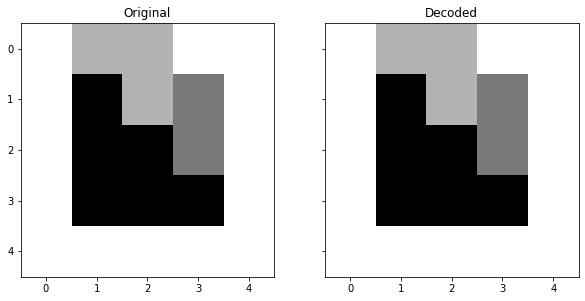

In [140]:
print("Compressed image: ", compressed_image)

fig, axs = plt.subplots(1, len(names), sharey=True, figsize = (10, 10))

for i in range(len(images)):
  axs[i].imshow(images[i], cmap="gray", vmin=0, vmax=256)
  axs[i].title.set_text(names[i])

plt.show();

# **Run-length coding**

In [141]:
def encodeList(l):
  temp = 0
  count = 0
  encoded = ""
  
  for i, v in enumerate(l):
    if temp == v:
      count += 1
      if i == len(l) -1:
        encoded += str(count)
    else:
      encoded += str(count)
      count = 1
      if temp == 0:
        temp = 1
      else:
        temp = 0  
      if i == len(l) -1:
        encoded += str(count)
  return encoded

def runLengthBinary(binary_image):
  en = []
  for r in binary_image:
    en.append(encodeList(r))
  encoded = "(" + ")(".join(en) + ")"
  return encoded

def runLengthn(image, n_bit = 8):
  from sympy.combinatorics.graycode import GrayCode

  gc = GrayCode(n_bit)
  gray_coden = list(gc.generate_gray())

  plane_list = []
  for _ in range(n_bit):
    plane_list.append(np.zeros_like(image))

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        for p in range(n_bit):
          plane_list[p][i,j] = gray_coden[image[i,j]][-p-1]

  result = []
  for p in plane_list:
    r = runLengthBinary(p)
    result.append(r)
  
  return "".join(result)

In [142]:
print(runLengthn(image, 8))

(5)(5)(5)(5)(5)(122)(212)(5)(5)(5)(122)(221)(311)(5)(5)(122)(212)(5)(5)(5)(5)(5)(5)(5)(5)(122)(212)(5)(5)(5)(122)(221)(311)(5)(5)(05)(011111)(0131)(0131)(05)


# **JPEG Encoding**

Original : (16, 16)


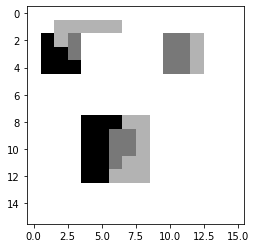

In [143]:
image = np.array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                  [255, 255, 180, 180, 180, 180, 180, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                  [255,   0, 180, 120, 255, 255, 255, 255, 255, 255, 120, 120, 180, 255, 255, 255],
                  [255,   0,   0, 120, 255, 255, 255, 255, 255, 255, 120, 120, 180, 255, 255, 255],
                  [255,   0,   0,   0, 255, 255, 255, 255, 255, 255, 120, 120, 180, 255, 255, 255],
                  [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                  [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                  [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                  [255, 255, 255, 255,   0,   0,   0, 180, 180, 255, 255, 255, 255, 255, 255, 255],
                  [255, 255, 255, 255,   0,   0, 120, 120, 180, 255, 255, 255, 255, 255, 255, 255],
                  [255, 255, 255, 255,   0,   0, 120, 120, 180, 255, 255, 255, 255, 255, 255, 255],
                  [255, 255, 255, 255,   0,   0, 120, 180, 180, 255, 255, 255, 255, 255, 255, 255],
                  [255, 255, 255, 255,   0,   0, 180, 180, 180, 255, 255, 255, 255, 255, 255, 255],
                  [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                  [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                  [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]]).astype(float)

print("Original :", image.shape)
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.show()

subtract image with 128 

In [144]:
def subtract128(image):
  subtract_image = []
  for i in range(0, image.shape[0], 8):
    for j in range(0, image.shape[1], 8):
      subtract_image.append(image[i:i+8, j:j+8] - 128)
  return subtract_image

subtract_image = subtract128(image)

discrete fourier transform

In [145]:
def dctJPEG(image):
  from scipy.fftpack import dct, idct

  dct_image = []
  for img in image:
    dct_image.append(dct(img))
  
  return dct_image

dct_image = dctJPEG(subtract_image)

quantization

In [146]:
def quantization(image):
  qtable = np.array([[16, 11, 10, 16, 24,	 40,	 51,	61],
                    [12, 12, 14, 19, 26,	 58,	 60,	55],
                    [14, 13, 16, 24, 40,	 57,	 69,	56],
                    [14, 17, 22, 29, 51,	 87,	 80,	62],
                    [18, 22, 37, 56, 68,	 109, 103,	77],
                    [24, 35, 55, 64, 81,	 104, 113,	92],
                    [49, 64, 78, 87, 103, 121, 120,	101],
                    [72, 92, 95, 98, 112, 100, 103,	99]])

  quantized_image = []
  for di in image:
    quantized_image.append(di/qtable)
  
  return quantized_image

quantized_image = quantization(dct_image)

zigzag scan

In [147]:
def zigzag(image):
  rows=8
  columns=8
  dcs = []
  acs = []
  for q in image:
    matrix = q
    solution=[[] for i in range(rows+columns-1)]
      
    for i in range(rows):
        for j in range(columns):
            sum=i+j
            if(sum%2 ==0):
                #add at beginning
                solution[sum].insert(0,matrix[i][j])
            else:
      
                #add at end of the list
                solution[sum].append(matrix[i][j])
              
                  
    # print the solution as it as
    zz_list = []
    for i in solution:
        for j in i:
            zz_list.append(int(j))
    dcs.append(zz_list[0])
    acs.append(zz_list[1:])
  
  return dcs, acs

dcs, acs = zigzag(quantized_image)

dc compressed

In [148]:
def dcCompressed(dcs):
  diff_dcs = []
  for i in range(len(dcs)-1):
    diff_dcs.append(dcs[i] - dcs[i+1])

  huffman = HuffmanEncoder()
  compressed_dc, table_dc = huffman.encode(np.array(diff_dcs))
  return compressed_dc

compressed_dc = dcCompressed(dcs)
print(compressed_dc)

11010


ac compressed

In [149]:
def acCompressed(acs):
  return runLengthn(np.array(acs), 8)

compressed_ac = acCompressed(acs)
compressed_ac

'(13322181234173217210)(1173431111114331)(011113114231115111111029110)(2121123111221111115231)(1111344113216231321229)(7111612122712128)(72121223213231214112117110)(02122142152210128)(11112631111222427111111019)(117264217131)(02112112312122211111111112118)(22183542)(1323115212117231)(11511252121239)(0121121112113112127131)(012212119242)(11421251132110128)(125121511213128)(031315352110128)(11719213128)(2142117342)(12529242)(06148242)(19242)(1216143)(12529143)(01213111143)(12529143)(712111516115121)(1151217151427313729)(51613161322184739)(091935236124)'

In [150]:
print("JPEG Encoded image:")
compressed_dc + compressed_ac

JPEG Encoded image:


'11010(13322181234173217210)(1173431111114331)(011113114231115111111029110)(2121123111221111115231)(1111344113216231321229)(7111612122712128)(72121223213231214112117110)(02122142152210128)(11112631111222427111111019)(117264217131)(02112112312122211111111112118)(22183542)(1323115212117231)(11511252121239)(0121121112113112127131)(012212119242)(11421251132110128)(125121511213128)(031315352110128)(11719213128)(2142117342)(12529242)(06148242)(19242)(1216143)(12529143)(01213111143)(12529143)(712111516115121)(1151217151427313729)(51613161322184739)(091935236124)'

In [151]:
def JPEG(image):
  subtract_image = subtract128(image)
  dct_image = dctJPEG(subtract_image)
  quantized_image = quantization(dct_image)
  dcs, acs = zigzag(quantized_image)
  compressed_dc = dcCompressed(dcs)
  compressed_ac = acCompressed(acs)
  return compressed_dc + compressed_ac

In [152]:
print("JPEG Encoded image:")
JPEG(image)

JPEG Encoded image:


'11010(13322181234173217210)(1173431111114331)(011113114231115111111029110)(2121123111221111115231)(1111344113216231321229)(7111612122712128)(72121223213231214112117110)(02122142152210128)(11112631111222427111111019)(117264217131)(02112112312122211111111112118)(22183542)(1323115212117231)(11511252121239)(0121121112113112127131)(012212119242)(11421251132110128)(125121511213128)(031315352110128)(11719213128)(2142117342)(12529242)(06148242)(19242)(1216143)(12529143)(01213111143)(12529143)(712111516115121)(1151217151427313729)(51613161322184739)(091935236124)'